##KNN

In [26]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#import the dataset
data=pd.read_csv('expanded_post_secondary_dropout_dataset.csv')
data.head()

,Student ID,Age,Gender,Marital Status,Application Mode,Application Order,Course,Attendance,Previous Qualification,Nationality,...,Credits Completed,First Sem GPA,Attendance Rate,Extracurriculars,On-Campus,Work Hours,Mental Health,Advisor Meetings,Study Hours,Target
0,1,36,Other,Married,Transfer,4,Law,Evening,Master,Domestic,...,8,2.7,61,2,Yes,9,2,5,20,1
1,2,43,Male,Divorced,Special admission,2,Medicine,Daytime,Master,Domestic,...,4,3.5,77,3,Yes,28,2,3,27,1
2,3,44,Female,Widowed,Special admission,6,Arts,Daytime,High School,Domestic,...,7,1.1,77,5,No,1,2,2,21,1
3,4,18,Male,Divorced,In-person,4,Business,Daytime,Bachelor,Domestic,...,17,2.7,81,4,Yes,14,10,4,7,0
4,5,28,Female,Divorced,In-person,2,Arts,Daytime,Master,International,...,4,1.3,92,0,Yes,3,1,2,18,1


In [28]:
#how many data
data.shape

(2600, 36)

In [29]:
#data information and description
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student ID                 2600 non-null   int64  
 1   Age                        2600 non-null   int64  
 2   Gender                     2600 non-null   object 
 3   Marital Status             2600 non-null   object 
 4   Application Mode           2600 non-null   object 
 5   Application Order          2600 non-null   int64  
 6   Course                     2600 non-null   object 
 7   Attendance                 2600 non-null   object 
 8   Previous Qualification     2600 non-null   object 
 9   Nationality                2600 non-null   object 
 10  Mother Qualification       2600 non-null   object 
 11  Father Qualification       2600 non-null   object 
 12  Mother Occupation          2600 non-null   object 
 13  Father Occupation          2600 non-null   objec

,Student ID,Age,Application Order,HS GPA,Test Score,Family Income,Financial Aid,Credits Attempted,Credits Completed,First Sem GPA,Attendance Rate,Extracurriculars,Work Hours,Mental Health,Advisor Meetings,Study Hours,Target
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,1300.500000,31.697308,4.907308,3.009077,74.448077,84056.434615,12460.473846,13.438077,6.654231,2.009615,80.207692,2.490000,14.973077,5.600000,2.448077,22.805769,0.861538
std,750.699674,8.109931,2.593586,0.577308,14.498557,37097.409105,7143.306002,2.883664,4.557366,1.150887,11.860804,1.689856,8.951756,2.856986,1.726933,10.361806,0.345450
min,1.000000,18.000000,1.000000,2.000000,50.000000,20011.000000,19.000000,9.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000
25%,650.750000,25.000000,3.000000,2.500000,61.000000,52561.500000,6381.750000,11.000000,3.000000,1.000000,70.000000,1.000000,7.000000,3.000000,1.000000,14.000000,1.000000
50%,1300.500000,32.000000,5.000000,3.000000,74.000000,83340.000000,12378.000000,13.000000,6.000000,2.000000,80.000000,2.000000,15.000000,6.000000,2.000000,23.000000,1.000000
75%,1950.250000,39.000000,7.000000,3.500000,87.000000,115309.500000,18725.250000,16.000000,10.000000,3.000000,90.000000,4.000000,23.000000,8.000000,4.000000,32.000000,1.000000
max,2600.000000,45.000000,9.000000,4.000000,99.000000,149854.000000,24989.000000,18.000000,18.000000,4.000000,100.000000,5.000000,30.000000,10.000000,5.000000,40.000000,1.000000


In [30]:
#check the unique values marital status ,application mode, course, attendance


data['Marital Status'].unique()


array(['Married', 'Divorced', 'Widowed', 'Single'], dtype=object)

In [31]:
data['Application Mode'].unique()


array(['Transfer', 'Special admission', 'In-person', 'Online'],
      dtype=object)

In [32]:
data['Course'].unique()


array(['Law', 'Medicine', 'Arts', 'Business', 'Engineering',
       'Computer Science', 'Education'], dtype=object)

In [33]:
data['Attendance'].unique()

array(['Evening', 'Daytime'], dtype=object)

In [34]:
#encode
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Marital Status']=le.fit_transform(data['Marital Status'])
data.head()
data['Gender']=le.fit_transform(data['Gender'])
data.head()
data['Application Mode']=le.fit_transform(data['Application Mode'])
data.head()
data['Course']=le.fit_transform(data['Course'])
data.head()
data['Attendance']=le.fit_transform(data['Attendance'])
data.head()
data['Previous Qualification']=le.fit_transform(data['Previous Qualification'])
data.head()
data['Nationality']=le.fit_transform(data['Nationality'])
data.head()
data['On-Campus']=le.fit_transform(data['On-Campus'])
data.head()

,Student ID,Age,Gender,Marital Status,Application Mode,Application Order,Course,Attendance,Previous Qualification,Nationality,...,Credits Completed,First Sem GPA,Attendance Rate,Extracurriculars,On-Campus,Work Hours,Mental Health,Advisor Meetings,Study Hours,Target
0,1,36,2,1,3,4,5,1,2,0,...,8,2.7,61,2,1,9,2,5,20,1
1,2,43,1,0,2,2,6,0,2,0,...,4,3.5,77,3,1,28,2,3,27,1
2,3,44,0,3,2,6,0,0,1,0,...,7,1.1,77,5,0,1,2,2,21,1
3,4,18,1,0,0,4,1,0,0,0,...,17,2.7,81,4,1,14,10,4,7,0
4,5,28,0,0,0,2,0,0,2,1,...,4,1.3,92,0,1,3,1,2,18,1


Visualize the dataset

*Create a scatter plot Of Marital Status

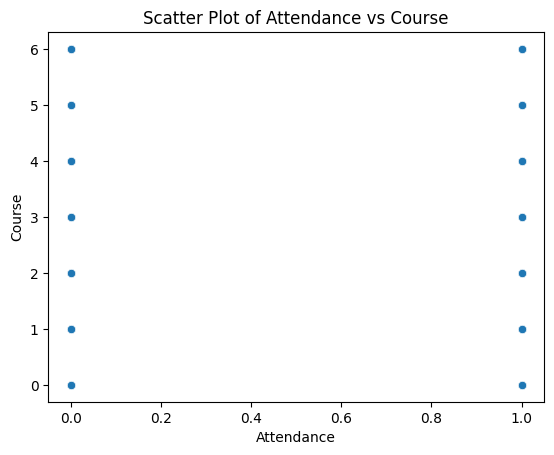

In [35]:
#scatter plot
# Scatter plot
sns.scatterplot(x='Attendance', y='Course', data=data)
plt.xlabel('Attendance')  # Label for x-axis
plt.ylabel('Course')      # Label for y-axis
plt.title('Scatter Plot of Attendance vs Course')  # Title
plt.show()

Create KNN Model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [37]:
#create test and training dataset
x=data.drop('Attendance',axis=1)
y=data['Attendance']


In [38]:
#training dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,#independent variable
                                               y,#dependent variable
                                               test_size=0.2,#training 80% testing 20%
                                               random_state=42 #reproducable results
                                               )

In [39]:
# Identify categorical columns
categorical_cols = x_train.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Identify categorical columns
categorical_cols = x_train.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
for col in categorical_cols:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])


# Perform one-hot encoding
x_train_encoded = pd.get_dummies(x_train, columns=categorical_cols)
x_test_encoded = pd.get_dummies(x_test, columns=categorical_cols)
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)
#knn.fit(x_train_encoded,y_train) # Changed x_train to x_train_encoded
#knn.score(x_test_encoded,y_test)

0.5134615384615384

In [40]:
#test the performance with different k value
for i in range(1,11):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  print(f'k={i},accuracy={knn.score(x_test,y_test)}')

k=1,accuracy=0.5115384615384615
k=2,accuracy=0.5096153846153846
k=3,accuracy=0.5134615384615384
k=4,accuracy=0.5173076923076924
k=5,accuracy=0.5211538461538462
k=6,accuracy=0.5307692307692308
k=7,accuracy=0.5384615384615384
k=8,accuracy=0.5134615384615384
k=9,accuracy=0.5269230769230769
k=10,accuracy=0.5057692307692307


In [41]:
#Knn classification report
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.63      0.56       256
           1       0.52      0.39      0.44       264

    accuracy                           0.51       520
   macro avg       0.51      0.51      0.50       520
weighted avg       0.51      0.51      0.50       520



##Hyperparameter - KNN

In [42]:
#import machine learnign libraries
from sklearn.ensemble import RandomForestClassifier

#cross validation using Grid search
from sklearn.model_selection import GridSearchCV

#Cross vlidation for random search
from sklearn.model_selection import RandomizedSearchCV

#Model evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

Load the dataset and some EDA processes

In [43]:
#data import
data = pd.read_csv('expanded_post_secondary_dropout_dataset.csv')
data.head()

,Student ID,Age,Gender,Marital Status,Application Mode,Application Order,Course,Attendance,Previous Qualification,Nationality,...,Credits Completed,First Sem GPA,Attendance Rate,Extracurriculars,On-Campus,Work Hours,Mental Health,Advisor Meetings,Study Hours,Target
0,1,36,Other,Married,Transfer,4,Law,Evening,Master,Domestic,...,8,2.7,61,2,Yes,9,2,5,20,1
1,2,43,Male,Divorced,Special admission,2,Medicine,Daytime,Master,Domestic,...,4,3.5,77,3,Yes,28,2,3,27,1
2,3,44,Female,Widowed,Special admission,6,Arts,Daytime,High School,Domestic,...,7,1.1,77,5,No,1,2,2,21,1
3,4,18,Male,Divorced,In-person,4,Business,Daytime,Bachelor,Domestic,...,17,2.7,81,4,Yes,14,10,4,7,0
4,5,28,Female,Divorced,In-person,2,Arts,Daytime,Master,International,...,4,1.3,92,0,Yes,3,1,2,18,1


In [44]:
#data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student ID                 2600 non-null   int64  
 1   Age                        2600 non-null   int64  
 2   Gender                     2600 non-null   object 
 3   Marital Status             2600 non-null   object 
 4   Application Mode           2600 non-null   object 
 5   Application Order          2600 non-null   int64  
 6   Course                     2600 non-null   object 
 7   Attendance                 2600 non-null   object 
 8   Previous Qualification     2600 non-null   object 
 9   Nationality                2600 non-null   object 
 10  Mother Qualification       2600 non-null   object 
 11  Father Qualification       2600 non-null   object 
 12  Mother Occupation          2600 non-null   object 
 13  Father Occupation          2600 non-null   objec

We have 36 coulmns in our dataset
We identify independemt variable are first 35 columns


identify x and y

In [45]:

x=data.drop(['Target'],axis=1)
y=data['Target']


Split the dataset into training and testing



In [46]:
#split the testing and training
from sklearn.model_selection import train_test_split


y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(x,#independent variable, changed from X to x
                                                    y,#target variable
                                                    test_size=0.2,#20% testing data
                                                    random_state=42#reproducable results
                                                    )

Crossvalidation using Gridsearch

In [49]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


#parameter for crossvalidation

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Example values for n_neighbors
    'weights': ['uniform', 'distance'],  # Example values for weights
    'metric': ['euclidean', 'manhattan']  # Example values for metric
}
#gridsearch
gridsearch = GridSearchCV(estimator=knn, # Now 'knn' refers to an object
                          param_grid=knn_param_grid,
                          scoring='accuracy',
                           n_jobs=-1,
                           cv=5)
grid_result = gridsearch.fit(x_train,y_train)

In [50]:
#extract all crossvalidation results
pd.DataFrame(grid_result.cv_results_) [ ['params','mean_test_score']]

,params,mean_test_score
0,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.825962
1,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.812019
2,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.848558
3,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.834615
4,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.859135
5,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.848077
6,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.861538
7,"{'metric': 'euclidean', 'n_neighbors': 9, 'wei...",0.855769
8,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.828846
9,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.819712


extract the best combination

In [51]:
best_model=grid_result.best_estimator_
print(best_model)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)


In [52]:


#summary of the results

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 49  26]
 [274 171]]
              precision    recall  f1-score   support

           0       0.15      0.65      0.25        75
           1       0.87      0.38      0.53       445

    accuracy                           0.42       520
   macro avg       0.51      0.52      0.39       520
weighted avg       0.76      0.42      0.49       520

0.4230769230769231
